# Latifundia Economics
**Equilibrium size distribution of Farms (Competitive  market-power and/or tax-distorted)**

New production function  $S^{1-\gamma}$

Jonathan Conning

In [1]:
%reload_ext watermark
%watermark -u -n -t 

last updated: Mon May 14 2018 11:45:08


This describes models and code implementation for several variations on a neo-classical model. The framework allows us to explore how factor endowments, the initial distribution of property rights and skills in the population interact with production technologies to shape equilibrium patterns of agrarian production organization and the size distribution of farms. The most original part of the focus is on endogenous market power distortions that may arise when land ownership becomes concentrated.

 To understand the main arguments, consider the simplest case of a single landlord (or a cartel of landlords) surrounded by a fringe of small landowning or landless agricultural households.  If the lanlord owns a large fraction of the land endowment a standard partial-equilibrium analysis of non-price discriminating monopoly suggests the landlord would drive up the rental price of land by withholding land from the lease market. In a general equilibrium setting however there is another effect: by restricting other farmers' access to land landlords also lower the marginal product of labor on those farms. This increases the supply of labor to landlord estates at any given wage increasing landlords' potential income from monopsony rents.  This can lead to equilibria where landlords increase the size of their production estates scale well above efficient scale in a competitive economy.  A Latifundia-Minifundia type economy can emerge in which landlords operate large estates employing overly land-intensive production techniques while a large mass of farmers operate inefficiently and labor-intensive small parcels of land and sell labor to the landlord estate(s).

## The model

The following is a close adaptation of earlier statement of this problem(Conning, 2004, 2010).  We start with a simplified statement of the problem with just two types of households -- landlords and `peasants' and a very simple discrete distribution of farming skills.  We later generalize.

### Preliminaries

The economy has $\overline{T}$ units of cultivable land and $\overline{L}$ households with one unit of labor each. The economy-wide land to labor ratio is therefore $\overline{t}=\overline{T}/\overline{L}$. 
	
Household are indexed $i=1..$ $\overline{L}$ and each household has a non-traded farming skill level $s_{i}$ drawn from a known distribution $Z$. \ There is also an initial distribution of property rights over land. We'll make more flexible assumptions later but for now suffice to say that there is a group of "landlord" households (fraction $\lambda $ of the total) who together own fraction $\theta $ of the land endowment. In some scenarios below they will collude to coordinate their factor market demands and supplies as if they were a single landlord `cartel'. \  
	
As the $\lambda \overline{L}$ landlord households own $\theta \overline{T}$ units of land, peasant households own the remaining $(1-\theta )\overline{T}$ units. The average non-landlord household therefore owns $\frac{(1-\theta )\overline{t}}{(1-\lambda )}$ units and, for the moment, all peasant households have the same initial land endowment. Under these assumptions it can be shown that the land Gini coefficient is exactly $\left[ \theta -\lambda \right] .$
	
A single tradable good such as corn is produced and consumed in the economy at a unity price fixed by trade with the world market. \ Households maximize utility from consumption subject to household income from farm production plus net factor sales.  
	
All peasant households have access to the same production technology represented by a standard concave production function $\widehat{F}(T,L,s)$ assumed for now to be linearly homogenous in its three arguments: land $T,$labor $L$, and a third factor which we label $s.$This last factor is assumed to be a non-traded factor that captures farming skill or labor supervision ability$.$  

In the illustrative simulations below we assume a Cobb-Douglas form
$$\widehat{F}(T,L,s)=s^{1-\gamma }\cdot \left[ T^{\alpha }L^{1-\alpha }\right] ^{\gamma }$$

### Python implementation and Objects

The model in python builds off similar earlier efforts in Mathcad and MATLAB.  

I employ object oriented programming ideas, first defining a "class" of Economy. An instance of an economy is an object with atributes including an associated endowment and technology as well as an initial distribution of property rights and non-traded skills. The economy class includes methods for finding a vector of market-clearing factor prices and associated equilibrium net factor demands and outputs.  

I will later define a subclass PowerEconomy which inherits all the attributes of the Economy class but adds a few methods to compute market-power distorted equilibria.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed

plt.rcParams["figure.figsize"] = (10, 8)
np.set_printoptions(precision=4)
%matplotlib inline

Most of the code for this project is in the **geqfarm** module (which has Economy, MirEconomy and CESEconomy class definitions).  For the code and documentation type:

    geqfarm??

In [4]:
from geqfarm import *

## Simulating Latifundia Economics

The following contrived example helps to starkly highlight the mechanisms behind the factor-market power distorted equilibrium.

TO start simple assume that there just N=5 farmers each with a skill level normalized to 1.  

In [5]:
N = 5

Now create an economy and change a few parameters from their default.  The $\gamma$ parameter which measures the degree of homogeneity in production is purposefully set very high.. We are very close to assuming constant returns to scale (but setting it just below 1 is needed to make sure the size-distribution remains determinate).

In [6]:
E = Economy(N)    # an instance takes N length as parameter
s = np.ones(N)    # skill distribution in the economy
E.ALPHA = 0.5
E.GAMMA = 0.98

In [7]:
E.s

array([1., 1., 1., 1., 1.])

In [8]:
E.smallhold_eq([E.TBAR,E.LBAR],E.s)

result(w=array([0.4615, 0.4615]), X=array([[20., 20., 20., 20., 20.],
       [20., 20., 20., 20., 20.]]))

In [9]:
E.cartel_eq(0.5)

result(w=array([0.4921, 0.4364]), X=array([[15.317 , 15.317 , 15.317 , 15.317 , 38.7318],
       [17.2708, 17.2708, 17.2708, 17.2708, 30.9167]]))

The Economy has default resource endowment:

In [10]:
E.TBAR,E.LBAR

(100, 100)

So as expected the efficient (competitive) resource allocation has every farmer operating a farm of equal unit size.  The smallhold_eq method gives the competitive (efficient) allocation for a subeconomy with XE = (TE,LE) endowments and skill distribution s. It returns a named tuple with equilibrium facor prices and X=[T,L] allocations.

If XE and s are those of the entire economy then we've found the economywide competitive allocation.  

In [11]:
Xc = E.smallhold_eq([E.TBAR,E.LBAR],s)
Xc

result(w=array([0.4615, 0.4615]), X=array([[20., 20., 20., 20., 20.],
       [20., 20., 20., 20., 20.]]))

In [12]:
(Xrc,Xr,wc,wr) = scene_print(E,10, detail=True)


Assumed Parameters
N = 5, GAMMA = 0.98, ALPHA = 0.5, LAMBDA = 0.2, TBAR = 100, LBAR = 100, H = 0.0, 
s (tail)= [1. 1. 1. 1. 1.], 
Lucas = False, analytic = False, 

Effcient:[ Trc, Lrc]      [rc, wc]      w/r    F( )    [r*Tr]  [w*Lr] 
        [ 20.00, 20.00]  [0.46,0.46]   1.00  | 18.84    9.23     9.23 

Theta  [ Tr, Lr ]      [rM,wM]        w/r  | F()   [T_hire]  [T_sale] [L_hire]
 0.00  [ 20.15, 23.64] [ 0.45, 0.47]  1.05 | 20.52     9.10     0.00    11.16  
 0.10  [ 19.24, 20.90] [ 0.46, 0.47]  1.02 | 18.89     8.79     4.57     9.74  
 0.20  [ 20.00, 20.00] [ 0.46, 0.46]  1.00 | 18.84     9.23     9.23     9.23  
 0.30  [ 22.75, 20.95] [ 0.47, 0.46]  0.98 | 20.53    10.63    14.01     9.56  
 0.40  [ 28.37, 24.15] [ 0.48, 0.45]  0.94 | 24.52    13.49    19.03    10.85  
 0.50  [ 38.73, 30.92] [ 0.49, 0.44]  0.89 | 32.24    19.06    24.60    13.49  
 0.60  [ 57.79, 44.98] [ 0.53, 0.41]  0.77 | 47.13    30.76    31.94    18.37  
 0.70  [ 84.94, 71.32] [ 0.65, 0.34]  0.53 | 71.34  

G:\E\GitHub\geqfarm\geqfarm.py:79: RuntimeWarning: invalid value encountered in double_scalars
  Y = s**(1-self.GAMMA)*((T**self.ALPHA)*(L**(1-self.ALPHA)))**self.GAMMA


 0.97  [ 99.95, 98.78] [  2.6, 0.10]  0.04 | 90.63   258.87   251.23    10.24  


Thus far we've said nothing of the ownership of land or labor.  Let's assume every household has one unit of labor but that the 'landlord' class (which WLOG we index to be the last skill group s[-1]) owns fraction $\theta$ of the land.  Assuming a uniform distribution of households across skills every skill group has Lbar/N households, and so there are that many landlords who act as a single cartel.

The following code is useful for printing and plotting out equilibria as a function of initial landlords' land ownership share.

We pass our economy instance to the scenarios function and it solves for competitive and market-power equilibria (at different levels of theta) and prints out the results.

Let's plot the results.. THis is the classic diagram from Latifundia Economics..

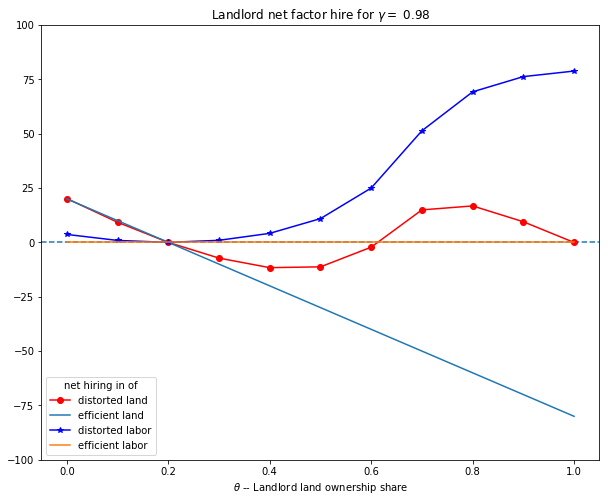

In [33]:
factor_plot(E,Xrc,Xr)

In the example above the 'landlord' farmer was in every way the same as the other farmers, the only difference being he had more land ownership (fraction $\theta$ of the total). He had the same skill parameter as every other farmer. In an efficient equilibrium his operational farm size should therefore be the same size as every other farmer. The plot above shows how monopoly power (which rises with $\theta$ allows the monopolist to distort the economy -- he withholds land from the lease market to drive up the land rental rate and, since this deprives the 'fringe' of farmers of land, lowers the marginal product of labor on each smallholder farm, increasing the smallholder labor supply to the market which pushes down the labor wage.  Hence we see how at higher levels of $\theta$ the landlord expands the size of his estate and establish monopsony power wages.

A key force keeping the landlord from becoming too large is the fact that their are diseconomies of scale in production.  THe landlord is expanding the scale of his operation (raising the land to labor ration on his farm in this example) earn more via distorted factor prices, but he balances off the increase in extraction from disorted wages against the cost of operating an inefficiently large farm (i.e. the cost of being too big). 

Now let's see the effect of making the landlord just a little bit more 'skilled' than the others.  This lowers the cost of being big.  But note that it also makes him bigger at lower theta and makes what I call the 'size monopsony or 'Feenstra' effect matter more..

So let's raise the landlord farmer's productivity 10% relative to the rest of the farmers.

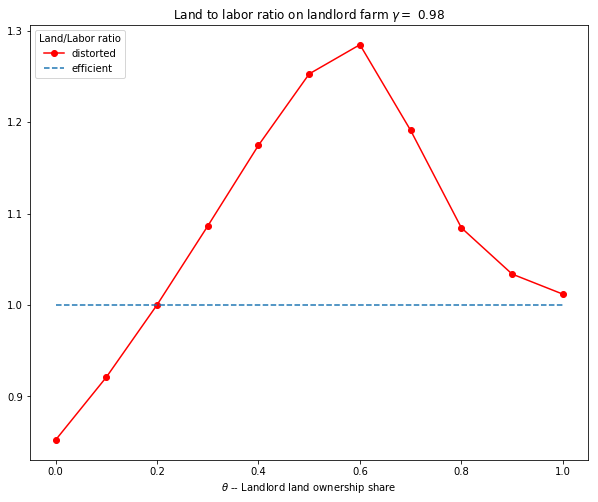

In [34]:
TLratio_plot(E,Xrc,Xr)

### Higher relative TFP to the farm with market power

In [35]:
E.s[-1]=1.5

Let's recalculate the new equilibria under the different scenarios.

In [36]:
(Xrc,Xr,wc,wr) = scene_print(E,10,detail=True)


Assumed Parameters
N = 5, GAMMA = 0.98, ALPHA = 0.5, LAMBDA = 0.2, TBAR = 100, LBAR = 100, H = 0.0, 
s (tail)= [1.  1.  1.  1.  1.5], 
Lucas = False, analytic = False, 

Effcient:[ Trc, Lrc]      [rc, wc]      w/r    F( )    [r*Tr]  [w*Lr] 
        [ 27.27, 27.27]  [0.46,0.46]   1.00  | 25.74   12.61    12.61 

Theta  [ Tr, Lr ]      [rM,wM]        w/r  | F()   [T_hire]  [T_sale] [L_hire]
 0.00  [ 25.69, 29.81] [ 0.45, 0.48]  1.06 | 26.11    11.55     0.00    14.19  
 0.10  [ 24.79, 26.78] [ 0.46, 0.47]  1.03 | 24.34    11.31     4.56    12.54  
 0.20  [ 25.76, 25.76] [ 0.46, 0.46]  1.00 | 24.34    11.91     9.24    11.91  
 0.30  [ 29.01, 26.85] [ 0.47, 0.46]  0.97 | 26.33    13.62    14.08    12.23  
 0.40  [ 35.43, 30.52] [ 0.48, 0.45]  0.93 | 30.91    17.02    19.22    13.62  
 0.50  [ 46.74, 38.07] [  0.5, 0.43]  0.86 | 39.46    23.42    25.05    16.40  
 0.60  [ 65.56, 52.67] [ 0.55, 0.40]  0.73 | 54.61    35.96    32.91    21.02  
 0.70  [ 87.42, 75.05] [ 0.67, 0.34]  0.50 | 74

G:\E\GitHub\geqfarm\geqfarm.py:79: RuntimeWarning: invalid value encountered in double_scalars
  Y = s**(1-self.GAMMA)*((T**self.ALPHA)*(L**(1-self.ALPHA)))**self.GAMMA


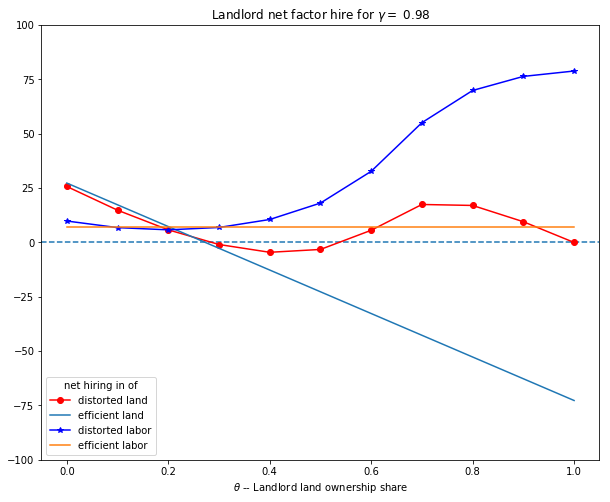

In [37]:
factor_plot(E,Xrc,Xr)

In [38]:
E.s[-1]

1.5

G:\E\GitHub\geqfarm\geqfarm.py:79: RuntimeWarning: invalid value encountered in double_scalars
  Y = s**(1-self.GAMMA)*((T**self.ALPHA)*(L**(1-self.ALPHA)))**self.GAMMA


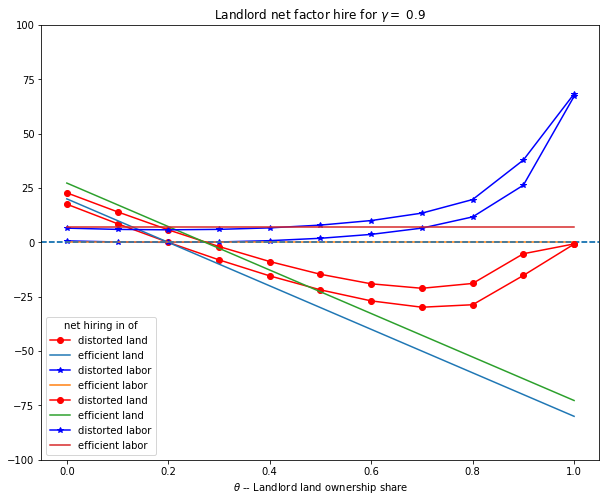

In [46]:
E.s[-1] = 1
E.GAMMA = 0.90

(Xrc,Xr,wc,wr) = scene_print(E,10,prnt=False, detail=True)
factor_plot(E,Xrc,Xr)
E.s[-1] = 1.5
(Xrc2,Xr2,wc2,wr2) = scene_print(E,10,prnt=False, detail=True)
factor_plot(E,Xrc2,Xr2)

Given that he is more skilled than before the landlord's efficient scale of production has increased. This lowers the cost of being big.  Interestingly at low $\theta$ this leads the landlord to hire less land and labor ...

NEXT STEPS:
Make the plot routines flexible to take multiple arguments to plot lines side by side e.g. factor_plot(Xrc0,Xr0,Xrc1,Xr1) would plot two scenarios on same figure.